## 1 - Explore the Data

The aim if this notebook is to:
* **Read in the intial dataset in its raw form**
* **Begin to understand it's layout and characteristics**
* **Determine opportunities for learning from the patterns it contains**
* **Determine opportunities/needs for data cleansing, etc**

## The Data/Preliminary Questions

The dataset that will be used for this project is titled `beer_reviews.csv` and originates from https://data.world/socialmediadata/beeradvocate

This dataset consists of `1,586,614` observations and has `13` columns as follows:
* `brewery_id`            int64
* `brewery_name`          object
* `review_time`           int64
* `review_overall`        float64
* `review_aroma`          float64
* `review_appearance`     float64
* `review_profilename`    object
* `beer_style`            object
* `review_palate`         float64
* `review_taste`          float64
* `beer_name`             object
* `beer_abv`              float64
* `beer_beerid`           int64

So of these 13 columns, the ones that may be of use to further analysis are, in other words, the features of our data are as follows:
* `review_overall`        float64
* `review_aroma`          float64
* `review_appearance`     float64
* `review_palate`         float64
* `review_taste`          float64

Of course, these features may be of further interest in gaining more knowledge of the domains within which they reside:
* `brewery_id`             int64
* `brewery_name`           object

* `beer_beerid`           int64
* `beer_name`              object

* `beer_style`             object

Finally, we might want to consider the shape (potential legitimacy of the actual review based upon who reviewed (or):
* `review_profilename`    object

It may of particular interest to determine how many reviews a given individual provided as related to reviews other reviewers may have provided.  This could further studied across `beer_style` e.g.,... if a certain reviewer did a fair amount of reviews... but the majority (88%+) were on IPA's... how much value does their review against a Wheat beer really hold.  Likewise... if 90% of their reviews reflect high ratings and they did a good number of reviews, how much value do these high ratings really mean to the actual beers being reviewed

## NOTE: numerous paths below are examples taken from a youtube video by Mike Bernico
https://www.youtube.com/watch?v=0GrciaGYzV0


In [1]:
from __future__ import print_function

In [2]:
# setup the essentials
import pandas as pd
import numpy as np

# load the data and take a quick peek
beer_all_data = pd.read_csv("../data/beer_reviews.csv")
beer_all_data.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [3]:
#report the shape and data types found witin
print('shape:\t', beer_all_data.shape)
print('\n')
print('dtpes:\t',beer_all_data.dtypes)

shape:	 (1586614, 13)


dtpes:	 brewery_id              int64
brewery_name           object
review_time             int64
review_overall        float64
review_aroma          float64
review_appearance     float64
review_profilename     object
beer_style             object
review_palate         float64
review_taste          float64
beer_name              object
beer_abv              float64
beer_beerid             int64
dtype: object


**Well that was interesting - kinda :-)**

But I think we need more descriptive metrics for our data - so let's see what we can come up with

For starters let's see if we have any missing values - that will cause our predictive code to go boom

In [4]:
# but first another import - C-Stats
from sklearn.metrics import roc_auc_score

In [5]:
# let's identify missing values
beer_all_data.describe()

,brewery_id,review_time,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid
count,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.518829e+06,1.586614e+06
mean,3.130099e+03,1.224089e+09,3.815581e+00,3.735636e+00,3.841642e+00,3.743701e+00,3.792860e+00,7.042387e+00,2.171279e+04
std,5.578104e+03,7.654427e+07,7.206219e-01,6.976167e-01,6.160928e-01,6.822184e-01,7.319696e-01,2.322526e+00,2.181834e+04
min,1.000000e+00,8.406720e+08,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e-02,3.000000e+00
25%,1.430000e+02,1.173224e+09,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,5.200000e+00,1.717000e+03
50%,4.290000e+02,1.239203e+09,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,6.500000e+00,1.390600e+04
75%,2.372000e+03,1.288568e+09,4.500000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.500000e+00,8.500000e+00,3.944100e+04
max,2.800300e+04,1.326285e+09,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.770000e+01,7.731700e+04


All values above have a count of x except for beer_abv which has a count 1.586614e+06 of 1.586614e+06
That means we need to deal with it... in this instance we will just dropna

In [22]:
# first... how many are null
beer_all_data[beer_all_data.beer_abv.isnull()].shape

(67785, 13)

In [24]:
#67785 is a good number... but in reality... we have 1.5 million rows so this would be about 4.5%
# dropping these seems a good idea
print('all rows', beer_all_data.shape)
print('after dropna rows', beer_all_data.dropna(axis=0).shape)

all rows (1586614, 13)
after dropna rows (1518478, 13)


In [25]:
# yes... dropem
beer_all_data.dropna(axis=0, inplace=True)
beer_all_data.shape

(1518478, 13)

by the looks of things beer_beerid and brewery_id do not appear to contribute to predictability - will likely drop these from the final model

review_overall and review_appearance have a range of 0 to 5.0 - wonder if the zeros represent missing data?
review_aroma, review_palate and review_taste range from 1 to 5.0 (which is expected)
beer_abv is all over the place (also expected but not necessarily helpful)

will likely want to scale the beer_abv and review metrics to have everything on a similar scale (that is except for the variable being predicted)

Next let's determine our numeric vs categorization variables

In [3]:
numeric_variables = list(beer_all_data.dtypes[beer_all_data.dtypes != "object"].index)
beer_all_data[numeric_variables].head()

,brewery_id,review_time,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid
0,10325,1234817823,1.5,2.0,2.5,1.5,1.5,5.0,47986
1,10325,1235915097,3.0,2.5,3.0,3.0,3.0,6.2,48213
2,10325,1235916604,3.0,2.5,3.0,3.0,3.0,6.5,48215
3,10325,1234725145,3.0,3.0,3.5,2.5,3.0,5.0,47969
4,1075,1293735206,4.0,4.5,4.0,4.0,4.5,7.7,64883


In [5]:
categorization_variables = list(beer_all_data.dtypes[beer_all_data.dtypes == "object"].index)
beer_all_data[categorization_variables].head()

,brewery_name,review_profilename,beer_style,beer_name
0,Vecchio Birraio,stcules,Hefeweizen,Sausa Weizen
1,Vecchio Birraio,stcules,English Strong Ale,Red Moon
2,Vecchio Birraio,stcules,Foreign / Export Stout,Black Horse Black Beer
3,Vecchio Birraio,stcules,German Pilsener,Sausa Pils
4,Caldera Brewing Company,johnmichaelsen,American Double / Imperial IPA,Cauldron DIPA


now to better understand our variables (both numeric and categorization)

In [6]:
# start by importing a few things
from sklearn.ensemble import RandomForestRegressor
# error metric (C-Stat)
from sklearn.metrics import roc_auc_score

In [27]:
# setup to run our first prediction
X_data = beer_all_data[numeric_variables]
# let's consider review_overall as our outcome variable
y_data = X_data.pop("review_overall")
X_data.head()

,brewery_id,review_time,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid
0,10325,1234817823,2.0,2.5,1.5,1.5,5.0,47986
1,10325,1235915097,2.5,3.0,3.0,3.0,6.2,48213
2,10325,1235916604,2.5,3.0,3.0,3.0,6.5,48215
3,10325,1234725145,3.0,3.5,2.5,3.0,5.0,47969
4,1075,1293735206,4.5,4.0,4.0,4.5,7.7,64883


In [29]:
mdl = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=42)
mdl.fit(X_data, y_data)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=True, random_state=42, verbose=0, warm_start=False)

That took forever to run - at least 15-20 minutes... will need to downsize this data but first... that this is done... let's see a few things'

In [30]:
# out of bag score - raw, first pass material here
mdl.oob_score_

0.65186203784664576

time to down size the data... that this data is divided into different styles of beer... lets start with the top 15-20 rated styles

In [67]:
beer_by_style = beer_all_data.groupby('beer_style').agg({
       'review_profilename': 'count'
    }).rename(columns={ 'review_profilename' : 'number_of_distinct_reviewers' })

beer_by_style.shape

(104, 1)

In [68]:
# sort by number_of_distinct_reviewers descending
beer_by_style.sort_values('number_of_distinct_reviewers', ascending=False, inplace=True)
#clear index
beer_by_style = beer_by_style.reset_index()
#top 5
beer_top_5 = beer_by_style.head(5)

print('Number of reviews:',beer_top_5.number_of_distinct_reviewers.sum())

Number of reviews: 359882


ok... so 359,882 reviews... that should be far more workable and efficient for our purposes]... now that we have identified the top 25 styles of beer.. let's join that in with our inital dataset to bet a smaller set of reviews to work with

hint: the shape of our new recordset should containt 359882 :-)

In [69]:
beer_reduced_data = pd.merge(beer_all_data, beer_top_5, how="inner", on=['beer_style'])
beer_reduced_data.shape

(359882, 14)

In [70]:
beer_reduced_data.groupby('beer_style').describe()

beer_abv                                 \
                                     count       mean       std  min  25%   
beer_style                                                                  
American Double / Imperial IPA     85105.0   9.370207  1.898356  5.5  8.5   
American Double / Imperial Stout   50137.0  10.605530  2.784990  4.5  8.8   
American IPA                      113144.0   6.635039  0.576990  0.5  6.2   
American Pale Ale (APA)            58072.0   5.469782  0.590667  2.0  5.0   
Russian Imperial Stout             53424.0   9.986842  1.595380  4.5  9.0   

                                                   beer_beerid                \
                                   50%   75%   max       count          mean   
beer_style                                                                     
American Double / Imperial IPA     9.0  10.0  41.0     85105.0  30767.619129   
American Double / Imperial Stout  10.0  11.2  39.0     50137.0  34403.682191   
American IPA                       6.7   7.0  11.0    113144.0  23459.781243   
American Pale Ale (APA)            5.4   5.9   9.4     58072.0  18292.540174   
Russian Imperial Stout             9.9  10.5  22.0     53424.0  21910.786856   

                                      ...      review_taste      review_time  \
                                      ...               75%  max       count   
beer_style                            ...                                      
American Double / Imperial IPA        ...               4.5  5.0     85105.0   
American Double / Imperial Stout      ...               4.5  5.0     50137.0   
American IPA                          ...               4.5  5.0    113144.0   
American Pale Ale (APA)               ...               4.0  5.0     58072.0   
Russian Imperial Stout                ...               4.5  5.0     53424.0   

                                                                           \
                                          mean           std          min   
beer_style                                                                  
American Double / Imperial IPA    1.247404e+09  6.096031e+07  973453611.0   
American Double / Imperial Stout  1.259649e+09  5.266788e+07  913248001.0   
American IPA                      1.237832e+09  6.943722e+07  899769601.0   
American Pale Ale (APA)           1.220151e+09  7.966435e+07  840672001.0   
Russian Imperial Stout            1.235765e+09  7.040089e+07  894326401.0   

                                                                            \
                                           25%           50%           75%   
beer_style                                                                   
American Double / Imperial IPA    1.211394e+09  1.261890e+09  1.297388e+09   
American Double / Imperial Stout  1.231048e+09  1.271120e+09  1.299912e+09   
American IPA                      1.199322e+09  1.252948e+09  1.294281e+09   
American Pale Ale (APA)           1.165285e+09  1.236058e+09  1.288409e+09   
Russian Imperial Stout            1.198128e+09  1.249714e+09  1.294101e+09   

                                                
                                           max  
beer_style                                      
American Double / Imperial IPA    1.326274e+09  
American Double / Imperial Stout  1.326265e+09  
American IPA                      1.326269e+09  
American Pale Ale (APA)           1.326285e+09  
Russian Imperial Stout            1.326267e+09  

[5 rows x 80 columns]

In [71]:
beer_top_5

,beer_style,number_of_distinct_reviewers
0,American IPA,113144
1,American Double / Imperial IPA,85105
2,American Pale Ale (APA),58072
3,Russian Imperial Stout,53424
4,American Double / Imperial Stout,50137


In [72]:
beer_reduced_data.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid,number_of_distinct_reviewers
0,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.70,64883,85105
1,2724,Pacific Coast Brewing Company,1291597385,2.5,3.5,3.5,isualum12,American Double / Imperial IPA,4.0,3.5,Holiday Imperial,9.00,55951,85105
2,2724,Pacific Coast Brewing Company,1265579599,2.5,3.0,3.5,kaseydad,American Double / Imperial IPA,3.0,3.0,Holiday Imperial,9.00,55951,85105
3,20658,7 Seas Brewery and Taproom,1267505224,4.0,4.0,4.0,barleywinefiend,American Double / Imperial IPA,4.0,4.0,Ballz Deep Double IPA,8.40,53679,85105
4,1454,Broad Ripple Brew Pub,1298059262,5.0,4.0,4.0,JamesS,American Double / Imperial IPA,4.5,4.5,Hopcicle Double IPA,9.00,55445,85105
5,1454,Broad Ripple Brew Pub,1276566829,4.0,3.5,4.0,tmoneyba,American Double / Imperial IPA,3.5,4.0,Hopcicle Double IPA,9.00,55445,85105
6,1454,Broad Ripple Brew Pub,1268435392,4.5,5.0,5.0,908carson,American Double / Imperial IPA,4.5,4.5,Hopcicle Double IPA,9.00,55445,85105
7,1454,Broad Ripple Brew Pub,1264536415,4.5,4.0,4.5,brundo4,American Double / Imperial IPA,4.0,4.0,Hopcicle Double IPA,9.00,55445,85105
8,1454,Broad Ripple Brew Pub,1263685665,4.0,4.5,4.0,thedrewski86,American Double / Imperial IPA,4.0,4.5,Hopcicle Double IPA,9.00,55445,85105
9,850,Moon River Brewing Company,1142807865,4.0,4.0,4.0,asabreed,American Double / Imperial IPA,4.0,4.0,Oatboy Imperial IPA,9.50,29142,85105


In [73]:
# save it off 
beer_reduced_data.to_csv("../data/beer_reviews_reduced.csv")

Now let's try that fit/predict again and see if its running a bit better

In [74]:
# setup to run our first prediction
X_data = beer_reduced_data[numeric_variables]
# let's consider review_overall as our outcome variable
y_data = X_data.pop("review_overall")
X_data.head()

,brewery_id,review_time,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid
0,1075,1293735206,4.5,4.0,4.0,4.5,7.7,64883
1,2724,1291597385,3.5,3.5,4.0,3.5,9.0,55951
2,2724,1265579599,3.0,3.5,3.0,3.0,9.0,55951
3,20658,1267505224,4.0,4.0,4.0,4.0,8.4,53679
4,1454,1298059262,4.0,4.0,4.5,4.5,9.0,55445


In [75]:
mdl = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=42)
mdl.fit(X_data, y_data)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=True, random_state=42, verbose=0, warm_start=False)

not quite so bad... but for my purposes (just want to proof the concept) this still takes too long... let's try top 5 and bottom 5 breweries of this reduced set

In [76]:
beer_by_brewery = beer_reduced_data.groupby('brewery_name').agg({
       'review_profilename': 'count'
    }).rename(columns={ 'review_profilename' : 'number_of_distinct_reviewers' })

beer_by_brewery.shape

(1990, 1)

In [78]:
# sort by number_of_distinct_reviewers descending
beer_by_brewery.sort_values('number_of_distinct_reviewers', ascending=False, inplace=True)
#clear index
beer_by_brewery = beer_by_brewery.reset_index()
#top 5
beer_top_5 = beer_by_brewery.head(5)

print('Number of reviews:',beer_top_5.number_of_distinct_reviewers.sum())

Number of reviews: 60978


In [80]:
# sort by number_of_distinct_reviewers descending
beer_by_brewery.sort_values('number_of_distinct_reviewers', ascending=False, inplace=True)
#clear index
beer_by_brewery = beer_by_brewery.reset_index()
#bottom 5
beer_bottom_5 = beer_by_brewery.tail(5)

print('Number of reviews:',beer_bottom_5.number_of_distinct_reviewers.sum())

Number of reviews: 5


nagh... let's stick with top 5 only... that prunes us down to 60,978 reviews

In [90]:
beer_minimal_data = pd.merge(beer_reduced_data, beer_top_5, how="inner", on=['brewery_name'])
beer_minimal_data.shape

(60978, 15)

and let's rerun our model


In [82]:
# setup to run our first prediction
X_data = beer_minimal_data[numeric_variables]
# let's consider review_overall as our outcome variable
y_data = X_data.pop("review_overall")
X_data.head()

,brewery_id,review_time,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid
0,1199,1301178258,3.5,4.5,4.0,4.5,9.4,34146
1,1199,1235439414,4.0,4.5,4.0,4.0,9.4,34146
2,1199,1249676851,4.5,3.0,4.0,4.0,10.4,47659
3,1199,1312764077,4.0,5.0,4.0,4.0,12.0,17538
4,1199,1232077950,4.0,3.5,4.0,4.5,12.0,17538


In [83]:
mdl = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=42)
mdl.fit(X_data, y_data)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=True, random_state=42, verbose=0, warm_start=False)

much much better... not quite a minute or so - this I can deal with

In [84]:
#code courtesy of Mike Bernico
# here is a simple function to show descriptive stats on the categorical variables
def describe_categorical(X):
    """
    Just like .describe(), but returns the results for categorical variables only.
    """
    from IPython.display import display, HTML
    display(HTML(X[X.columns[X.dtypes == "object"]].describe().to_html()))

In [91]:
describe_categorical(beer_minimal_data)

,brewery_name,review_profilename,beer_style,beer_name
count,60978,60978,60978,60978
unique,5,11220,5,135
top,Dogfish Head Brewery,Thorpe429,American IPA,90 Minute IPA
freq,14450,71,21112,3289


In [93]:
# Drop from this variables that I don't really think contribute
beer_minimal_data.drop(["beer_name"], axis=1, inplace=True)

#while at it... drop a few numerics
beer_minimal_data.drop(["beer_beerid", "brewery_id", "number_of_distinct_reviewers_x", "number_of_distinct_reviewers_y"], axis=1, inplace=True)

beer_minimal_data.head()

,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_abv
0,Founders Brewing Company,1301178258,4.5,3.5,4.5,TheDTrain,American Double / Imperial IPA,4.0,4.5,9.4
1,Founders Brewing Company,1235439414,3.5,4.0,4.5,Payso10,American Double / Imperial IPA,4.0,4.0,9.4
2,Founders Brewing Company,1249676851,4.5,4.5,3.0,northyorksammy,American Double / Imperial IPA,4.0,4.0,10.4
3,Founders Brewing Company,1312764077,4.0,4.0,5.0,chromemittenman,American Double / Imperial IPA,4.0,4.0,12.0
4,Founders Brewing Company,1232077950,4.5,4.0,3.5,mattster,American Double / Imperial IPA,4.0,4.5,12.0


In [97]:
# this is starting to look clean - let's do something about these categorical variables (brewery and style)
# we will add them as dummies... 
variables = ["brewery_name", "beer_style"]
for var in variables:
    dummies = pd.get_dummies(beer_minimal_data[var], prefix=var)
    beer_minimal_data = pd.concat([beer_minimal_data, dummies], axis=1)
    beer_minimal_data.drop([var], axis=1, inplace=True)

# let's have a look
beer_minimal_data.head()   

,review_time,review_overall,review_aroma,review_appearance,review_profilename,review_palate,review_taste,beer_abv,"brewery_name_Bell's Brewery, Inc.",brewery_name_Dogfish Head Brewery,brewery_name_Founders Brewing Company,brewery_name_Sierra Nevada Brewing Co.,brewery_name_Stone Brewing Co.,beer_style_American Double / Imperial IPA,beer_style_American Double / Imperial Stout,beer_style_American IPA,beer_style_American Pale Ale (APA),beer_style_Russian Imperial Stout
0,1301178258,4.5,3.5,4.5,TheDTrain,4.0,4.5,9.4,0,0,1,0,0,1,0,0,0,0
1,1235439414,3.5,4.0,4.5,Payso10,4.0,4.0,9.4,0,0,1,0,0,1,0,0,0,0
2,1249676851,4.5,4.5,3.0,northyorksammy,4.0,4.0,10.4,0,0,1,0,0,1,0,0,0,0
3,1312764077,4.0,4.0,5.0,chromemittenman,4.0,4.0,12.0,0,0,1,0,0,1,0,0,0,0
4,1232077950,4.5,4.0,3.5,mattster,4.0,4.5,12.0,0,0,1,0,0,1,0,0,0,0


In [116]:
# let's clean up some column names
beer_minimal_data.columns = beer_minimal_data.columns.str.replace(' ', '_')
beer_minimal_data.columns = beer_minimal_data.columns.str.replace('/', '_')
beer_minimal_data.columns = beer_minimal_data.columns.str.replace('___', '_')
beer_minimal_data.columns

Index([u'review_time', u'review_overall', u'review_aroma',
       u'review_appearance', u'review_profilename', u'review_palate',
       u'review_taste', u'beer_abv', u'brewery_name_Bell's_Brewery,_Inc.',
       u'brewery_name_Dogfish_Head_Brewery',
       u'brewery_name_Founders_Brewing_Company',
       u'brewery_name_Sierra_Nevada_Brewing_Co.',
       u'brewery_name_Stone_Brewing_Co.',
       u'beer_style_American_Double_Imperial_IPA',
       u'beer_style_American_Double_Imperial_Stout',
       u'beer_style_American_IPA', u'beer_style_American_Pale_Ale_(APA)',
       u'beer_style_Russian_Imperial_Stout'],
      dtype='object')

In [117]:
#code courtesy of Mike Bernico
# Look at all the columns in the dataset
def printall(X, max_rows=10):
    from IPython.display import display, HTML
    display(HTML(X.to_html(max_rows=max_rows)))
    
printall(beer_minimal_data)

,review_time,review_overall,review_aroma,review_appearance,review_profilename,review_palate,review_taste,beer_abv,"brewery_name_Bell's_Brewery,_Inc.",brewery_name_Dogfish_Head_Brewery,brewery_name_Founders_Brewing_Company,brewery_name_Sierra_Nevada_Brewing_Co.,brewery_name_Stone_Brewing_Co.,beer_style_American_Double_Imperial_IPA,beer_style_American_Double_Imperial_Stout,beer_style_American_IPA,beer_style_American_Pale_Ale_(APA),beer_style_Russian_Imperial_Stout
0,1301178258,4.5,3.5,4.5,TheDTrain,4.0,4.5,9.4,0,0,1,0,0,1,0,0,0,0
1,1235439414,3.5,4.0,4.5,Payso10,4.0,4.0,9.4,0,0,1,0,0,1,0,0,0,0
2,1249676851,4.5,4.5,3.0,northyorksammy,4.0,4.0,10.4,0,0,1,0,0,1,0,0,0,0
3,1312764077,4.0,4.0,5.0,chromemittenman,4.0,4.0,12.0,0,0,1,0,0,1,0,0,0,0
4,1232077950,4.5,4.0,3.5,mattster,4.0,4.5,12.0,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60973,1303296065,3.5,4.5,5.0,tbrown4,4.0,4.0,10.5,0,1,0,0,0,0,1,0,0,0
60974,1303048067,2.0,4.0,4.0,alpinebryant,3.0,1.0,10.5,0,1,0,0,0,0,1,0,0,0
60975,1302545724,4.5,5.0,4.5,morningthief,4.0,5.0,10.5,0,1,0,0,0,0,1,0,0,0
60976,1301798823,4.5,5.0,4.0,JHamm,4.5,5.0,10.5,0,1,0,0,0,0,1,0,0,0


In [118]:
numeric_variables = list(beer_minimal_data.dtypes[beer_minimal_data.dtypes != "object"].index)
#remove some of the clutter - at least for this analysis
numeric_variables.remove('review_time')

numeric_variables

['review_overall',
 'review_aroma',
 'review_appearance',
 'review_palate',
 'review_taste',
 'beer_abv',
 "brewery_name_Bell's_Brewery,_Inc.",
 'brewery_name_Dogfish_Head_Brewery',
 'brewery_name_Founders_Brewing_Company',
 'brewery_name_Sierra_Nevada_Brewing_Co.',
 'brewery_name_Stone_Brewing_Co.',
 'beer_style_American_Double_Imperial_IPA',
 'beer_style_American_Double_Imperial_Stout',
 'beer_style_American_IPA',
 'beer_style_American_Pale_Ale_(APA)',
 'beer_style_Russian_Imperial_Stout']

In [119]:
# now let's see how well this model does
# setup to run our first prediction
X_data = beer_minimal_data[numeric_variables]
# let's consider review_overall as our outcome variable
y_data = X_data.pop("review_overall")
X_data.head()

mdl = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=42)
mdl.fit(X_data, y_data)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=True, random_state=42, verbose=0, warm_start=False)

In [121]:
# last oob score was .65_mumble
mdl.oob_score_

0.52704591396913414

moving on... let's explore feature importance now

In [122]:
mdl.feature_importances_

array([ 0.05503387,  0.05260618,  0.07534851,  0.68129815,  0.08329819,
        0.00765398,  0.00732307,  0.00707169,  0.00559581,  0.00662278,
        0.00579389,  0.00504248,  0.00206682,  0.00161517,  0.00362941])

so that's purty... but what does it mean and how does it help... little if any... I know - let's graph this out 

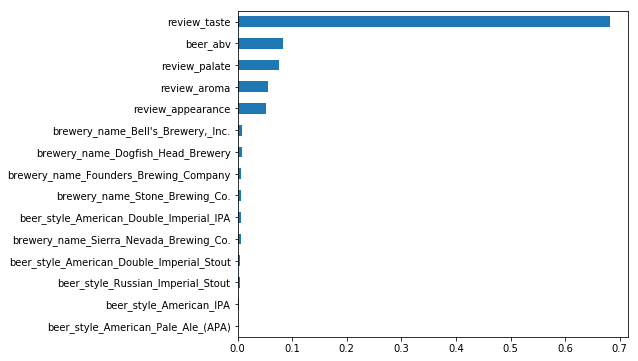

In [146]:
# import the goodies needed
%matplotlib inline
import seaborn as sns

feature_importances = pd.Series(mdl.feature_importances_, index=X_data.columns)
feature_importances.sort_values(inplace=True)
feature_importances.plot(kind="barh", figsize=(7,6));

now this is interesting... so... style and brewery really don't have an influence... however... abv, palate and especially taste do

aroma and appearance contribute as well but not as much as you might expect


In [130]:
# save beer_minimal_data for later
beer_minimal_data.to_csv("../data/beer_reviews_minimal.csv")